In [3]:
import json;
import urllib2
import os.path
import re;
from pymongo import MongoClient;
from riotwatcher import RiotWatcher
from collections import defaultdict
from itertools import chain
import pandas as pd
import cPickle as pickle
import numpy as np

def getUserInput():
    FileExists=os.path.isfile('RitoMongo.conf') ;
    res=[];
    if (FileExists):
        with open('RitoMongo.conf') as f:
            for line in f:
                res.append(line.rstrip('\n'));
                print line.rstrip('\n');
    elif (not FileExists):
        SummonerName= raw_input('Enter your Summoner name: ');
        Region  = (raw_input('Enter your region: ')).upper();
        Key = raw_input('Enter your API Key which you retrieved from Riot website: ');
        f = open('RitoMongo.conf','w');
        f.write(SummonerName+'\n'+Region+'\n'+Key);
        f.close();
    return res;

#================================= Main =====================================================
_InputFields= getUserInput();
SummonerName=_InputFields[0];
Region=_InputFields[1];
Key=_InputFields[2];

BearsAreScary
NA
d8eb3b3a-6401-42af-bb07-a021fd8d9545


In [13]:
w = RiotWatcher(key=Key)
tags = w.static_get_champion_list(champ_data='tags')
tag_dict = defaultdict(list)
champ_dict = defaultdict(list
                        )
for key, value in tags['data'].iteritems():
    tag_dict[value['id']].append(value['name'])
    champ_dict[value['id']].append(value['name'])
    tag_dict[value['id']].append(value['tags'])
    
tag_dict

defaultdict(list,
            {1: [u'Annie', [u'Mage']],
             2: [u'Olaf', [u'Fighter', u'Tank']],
             3: [u'Galio', [u'Tank', u'Mage']],
             4: [u'Twisted Fate', [u'Mage']],
             5: [u'Xin Zhao', [u'Fighter', u'Assassin']],
             6: [u'Urgot', [u'Marksman', u'Fighter']],
             7: [u'LeBlanc', [u'Assassin', u'Mage']],
             8: [u'Vladimir', [u'Mage', u'Tank']],
             9: [u'Fiddlesticks', [u'Mage', u'Support']],
             10: [u'Kayle', [u'Fighter', u'Support']],
             11: [u'Master Yi', [u'Assassin', u'Fighter']],
             12: [u'Alistar', [u'Tank', u'Support']],
             13: [u'Ryze', [u'Mage', u'Fighter']],
             14: [u'Sion', [u'Tank', u'Fighter']],
             15: [u'Sivir', [u'Marksman']],
             16: [u'Soraka', [u'Support', u'Mage']],
             17: [u'Teemo', [u'Marksman', u'Assassin']],
             18: [u'Tristana', [u'Marksman', u'Assassin']],
             19: [u'Warwick', [u'Fight

In [7]:
for k,v in tag_dict.iteritems():
    if 'Assassin' in v[1]:
        print(k,'yes')

(5, 'yes')
(7, 'yes')
(11, 'yes')
(17, 'yes')
(18, 'yes')
(23, 'yes')
(24, 'yes')
(28, 'yes')
(29, 'yes')
(35, 'yes')
(38, 'yes')
(39, 'yes')
(55, 'yes')
(56, 'yes')
(64, 'yes')
(67, 'yes')
(76, 'yes')
(80, 'yes')
(84, 'yes')
(90, 'yes')
(91, 'yes')
(92, 'yes')
(101, 'yes')
(103, 'yes')
(105, 'yes')
(107, 'yes')
(114, 'yes')
(121, 'yes')
(157, 'yes')
(202, 'yes')
(238, 'yes')
(245, 'yes')
(254, 'yes')


In [6]:
champ_df = pd.DataFrame.from_dict(champ_dict,orient='index')
champ_df.columns = ['Name']
champ_df['Assassin'] = 0
champ_df['Mage'] = 0
champ_df['Fighter'] = 0
champ_df['Tank'] = 0
champ_df['Support'] = 0
champ_df['Marksman'] = 0
for k,v in tag_dict.iteritems():
    if 'Assassin' in v[1]:
        champ_df['Assassin'][k] = 1
    else:
        champ_df['Assassin'][k] = 0
    if 'Mage' in v[1]:
        champ_df['Mage'][k] = 1
    else:
        champ_df['Mage'][k] = 0
    if 'Fighter' in v[1]:
        champ_df['Fighter'][k] = 1
    else:
        champ_df['Fighter'][k] = 0
    if 'Tank' in v[1]:
        champ_df['Tank'][k] = 1
    else:
        champ_df['Tank'][k] = 0
    if 'Support' in v[1]:
        champ_df['Support'][k] = 1
    else:
        champ_df['Support'][k] = 0
    if 'Marksman' in v[1]:
        champ_df['Marksman'][k] = 1
    else:
        champ_df['Marksman'][k] = 0
            
champ_df

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

,Name,Assassin,Mage,Fighter,Tank,Support,Marksman
1,Annie,0,1,0,0,0,0
2,Olaf,0,0,1,1,0,0
3,Galio,0,1,0,1,0,0
4,Twisted Fate,0,1,0,0,0,0
5,Xin Zhao,1,0,1,0,0,0
6,Urgot,0,0,1,0,0,1
7,LeBlanc,1,1,0,0,0,0
8,Vladimir,0,1,0,1,0,0
9,Fiddlesticks,0,1,0,0,1,0
10,Kayle,0,0,1,0,1,0


In [18]:
file_one = open('app/user_df.pkl','rb')
user_df = pickle.load(file_one)
file_one.close()
user_df.head(5)
user_df.fillna(0,inplace=True)
user_df.head(30)

,45200856,20627791,27891382,50638239,22300913,49226500,53804651,49631245,30014262,59932448,...,48579166,46173566,20600777,29230651,23552046,32865228,19910079,34961236,390513,46329353
1,5.0,0.0,0.0,3.0,6.0,15.0,0.0,7.0,1.0,0.0,...,0.0,0.0,0.0,3.0,11.0,0.0,0.0,0.0,0.0,0.0
2,5.0,0.0,1.0,2.0,2.0,0.0,2.0,8.0,4.0,0.0,...,0.0,1.0,0.0,2.0,1.0,0.0,2.0,0.0,1.0,0.0
3,11.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,366.0,0.0,0.0,0.0,49.0,0.0,0.0,1.0,2.0,16.0,...,3.0,4.0,1.0,0.0,0.0,1.0,1.0,11.0,0.0,0.0
5,0.0,0.0,0.0,6.0,2.0,0.0,0.0,11.0,5.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,5.0,62.0,0.0,0.0,135.0,28.0,2.0,...,10.0,0.0,1.0,0.0,3.0,0.0,8.0,0.0,12.0,0.0
8,0.0,0.0,0.0,0.0,3.0,16.0,1.0,0.0,0.0,0.0,...,26.0,1.0,0.0,5.0,1.0,0.0,2.0,0.0,0.0,0.0
9,1.0,0.0,1.0,3.0,2.0,0.0,0.0,0.0,2.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [23]:
R = user_df.values.T.tolist()
R = user_df.values.tolist()
R[:5]


[[5.0,
  0.0,
  0.0,
  3.0,
  6.0,
  15.0,
  0.0,
  7.0,
  1.0,
  0.0,
  0.0,
  0.0,
  37.0,
  1.0,
  0.0,
  2.0,
  1.0,
  0.0,
  0.0,
  0.0,
  34.0,
  0.0,
  1.0,
  4.0,
  1.0,
  0.0,
  0.0,
  2.0,
  0.0,
  3.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  15.0,
  0.0,
  1.0,
  0.0,
  4.0,
  4.0,
  0.0,
  1.0,
  0.0,
  1.0,
  11.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  3.0,
  10.0,
  4.0,
  3.0,
  2.0,
  6.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  3.0,
  17.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  2.0,
  0.0,
  0.0,
  0.0,
  1.0,
  56.0,
  1.0,
  1.0,
  6.0,
  4.0,
  1.0,
  9.0,
  0.0,
  0.0,
  1.0,
  3.0,
  0.0,
  19.0,
  0.0,
  2.0,
  1.0,
  0.0,
  3.0,
  1.0,
  17.0,
  0.0,
  0.0,
  1.0,
  0.0,
  18.0,
  0.0,
  3.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  3.0,
  0.0,
  1.0,
  12.0,
  3.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  1.0,
  2.0,
  36.0,
  0.0,
  3.0,


In [30]:
# parameters : U, V and features: D 
# this will establish matrix factorization using Gradient Descent
# given matrix is minimized
import numpy as np
def matrix_factorization(R, P, Q, K, steps=25, alpha=0.0002, beta=0.02):

    Q = Q.T
    error =[]
    for step in xrange(steps):
        print 'Step number %d' % step
        for i in xrange(len(R)):
            for j in xrange(len(R[i])):
                
                # if rated:
                if R[i][j] > 0:
                    
                    # calc. error 
                    eij = R[i][j] - np.dot(P[i,:],Q[:,j])
                        
                    # hence our gradient is d/dpik(eij^2) = -2(rij-Rhat)(qkj) =-2eij(qkj)
                    
                    # Here alpha is a constant whose value determines the rate of the approaching min.. 
                    
                    # our parameter B is used to control the magnitudes of the user-feature and item-features vectors.
                    # such that P and Q would give a good approximation of R
                    for k in xrange(K):
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        #print P[0][0]
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])
                        #print Q[0][0]

        eR = np.dot(P,Q)

        e = 0

        for i in xrange(len(R)):

            for j in xrange(len(R[i])):

                if R[i][j] > 0:

                    e = e + pow(R[i][j] - np.dot(P[i,:],Q[:,j]), 2)
                    
                    
                    for k in xrange(K):

                        e = e + (beta/2) * (pow(P[i][k],2) + pow(Q[k][j],2))
                        
        error.append(e)              
        if e < 0.001:

            break
        #print P
        #print Q

    return P, Q.T,error

In [4]:
R = [[5,3,0,1],
     [4,0,0,1],
     [1,1,0,5],
     [1,0,0,4],
     [0,1,5,4]]

In [31]:
R=np.array(R)

N= len(R)
M=len(R[0])

# We can assign 
K=2

# find p,q:   init U and M with randomized value between 0.0 and 1.0 with standard Gaussian distribution
P=np.random.rand(N,K)
Q=np.random.rand(M,K)
nP,nQ,error= matrix_factorization(R,P,Q,K)
nR=np.dot(nP,nQ.T)

Step number 0
Step number 1
Step number 2
Step number 3
Step number 4
Step number 5
Step number 6
Step number 7
Step number 8
Step number 9
Step number 10
Step number 11
Step number 12
Step number 13
Step number 14
Step number 15
Step number 16
Step number 17
Step number 18
Step number 19
Step number 20
Step number 21
Step number 22
Step number 23
Step number 24


In [33]:
print "P Matrix"
print nP
print "original_P matrix"
print P
print nP.shape
print '\n'

print "Q Matrix"
print nQ
print nQ.shape

print '\n'
print "R_hat Matrix"
print nR
nR.shape

error

P Matrix
[[ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ 

[160866396.59949839,
 153314092.04366851,
 151084661.37039813,
 148105003.62441972,
 141887227.58705464,
 136754505.04753804,
 134315963.06445542,
 132803039.74388783,
 131840317.1804446,
 131426490.7513334,
 131454186.28793024,
 131469846.14514551,
 131405387.42323987,
 131558561.02909224,
 131986803.27640368,
 132899405.97388306,
 136060310.23101836,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

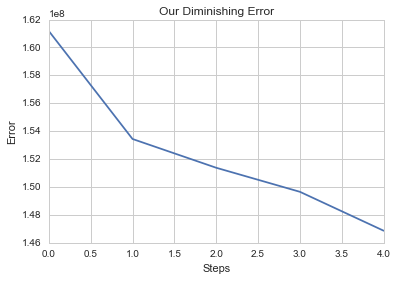

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('whitegrid')

plt.plot(error)
plt.title ("Our Diminishing Error")

plt.ylabel('Error')
plt.xlabel('Steps')